## Setup Libraries

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 

# Set the option to display all columns when printing DataFrames
pd.set_option("display.max_columns", None)

import datetime


## Load Data

* Id - A unique Id for each row.
* Time - Number of seconds elapsed between this transaction and the first transaction in the dataset
* V1-V28 - Features after dimensionality reduction to protect user identities and sensitive features
* Amount - Transaction amount
* Class - Target Class (1 for fraudulent transactions, 0 genuine)

In [2]:
raw_df = pd.read_csv(r"creditcard.csv")
raw_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Visiualize Data

In [4]:
fraud = raw_df[raw_df['Class'] == 1]
valid = raw_df[raw_df['Class'] == 0] 

fraud_count = len(raw_df[raw_df['Class'] == 1])
valid_count = len(raw_df[raw_df['Class'] == 0]) 

outlierFraction = fraud_count/float(valid_count) 

print(round(outlierFraction,3)) 
print(f"Fraud Cases: {fraud_count}") 
print(f"Valid Transactions: {valid_count}") 

0.002
Fraud Cases: 492
Valid Transactions: 284315


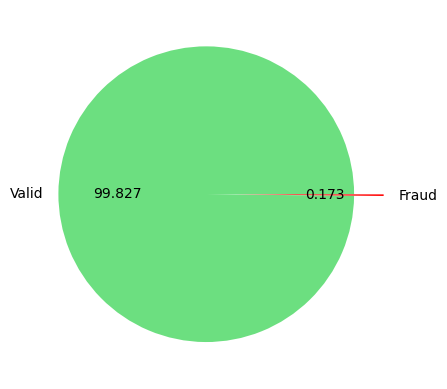

In [5]:
labels=["Valid","Fraud"]
values = np.array([valid_count,fraud_count])
myexplode = [0, 0.2]
mycolors = ["#6CdF80", "red"]

plt.pie(values, labels = labels, autopct='%.3f', explode = myexplode, colors=mycolors)
plt.show() 

In [6]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("Amount details of the valid transaction") 
valid.Amount.describe() 

Amount details of the valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

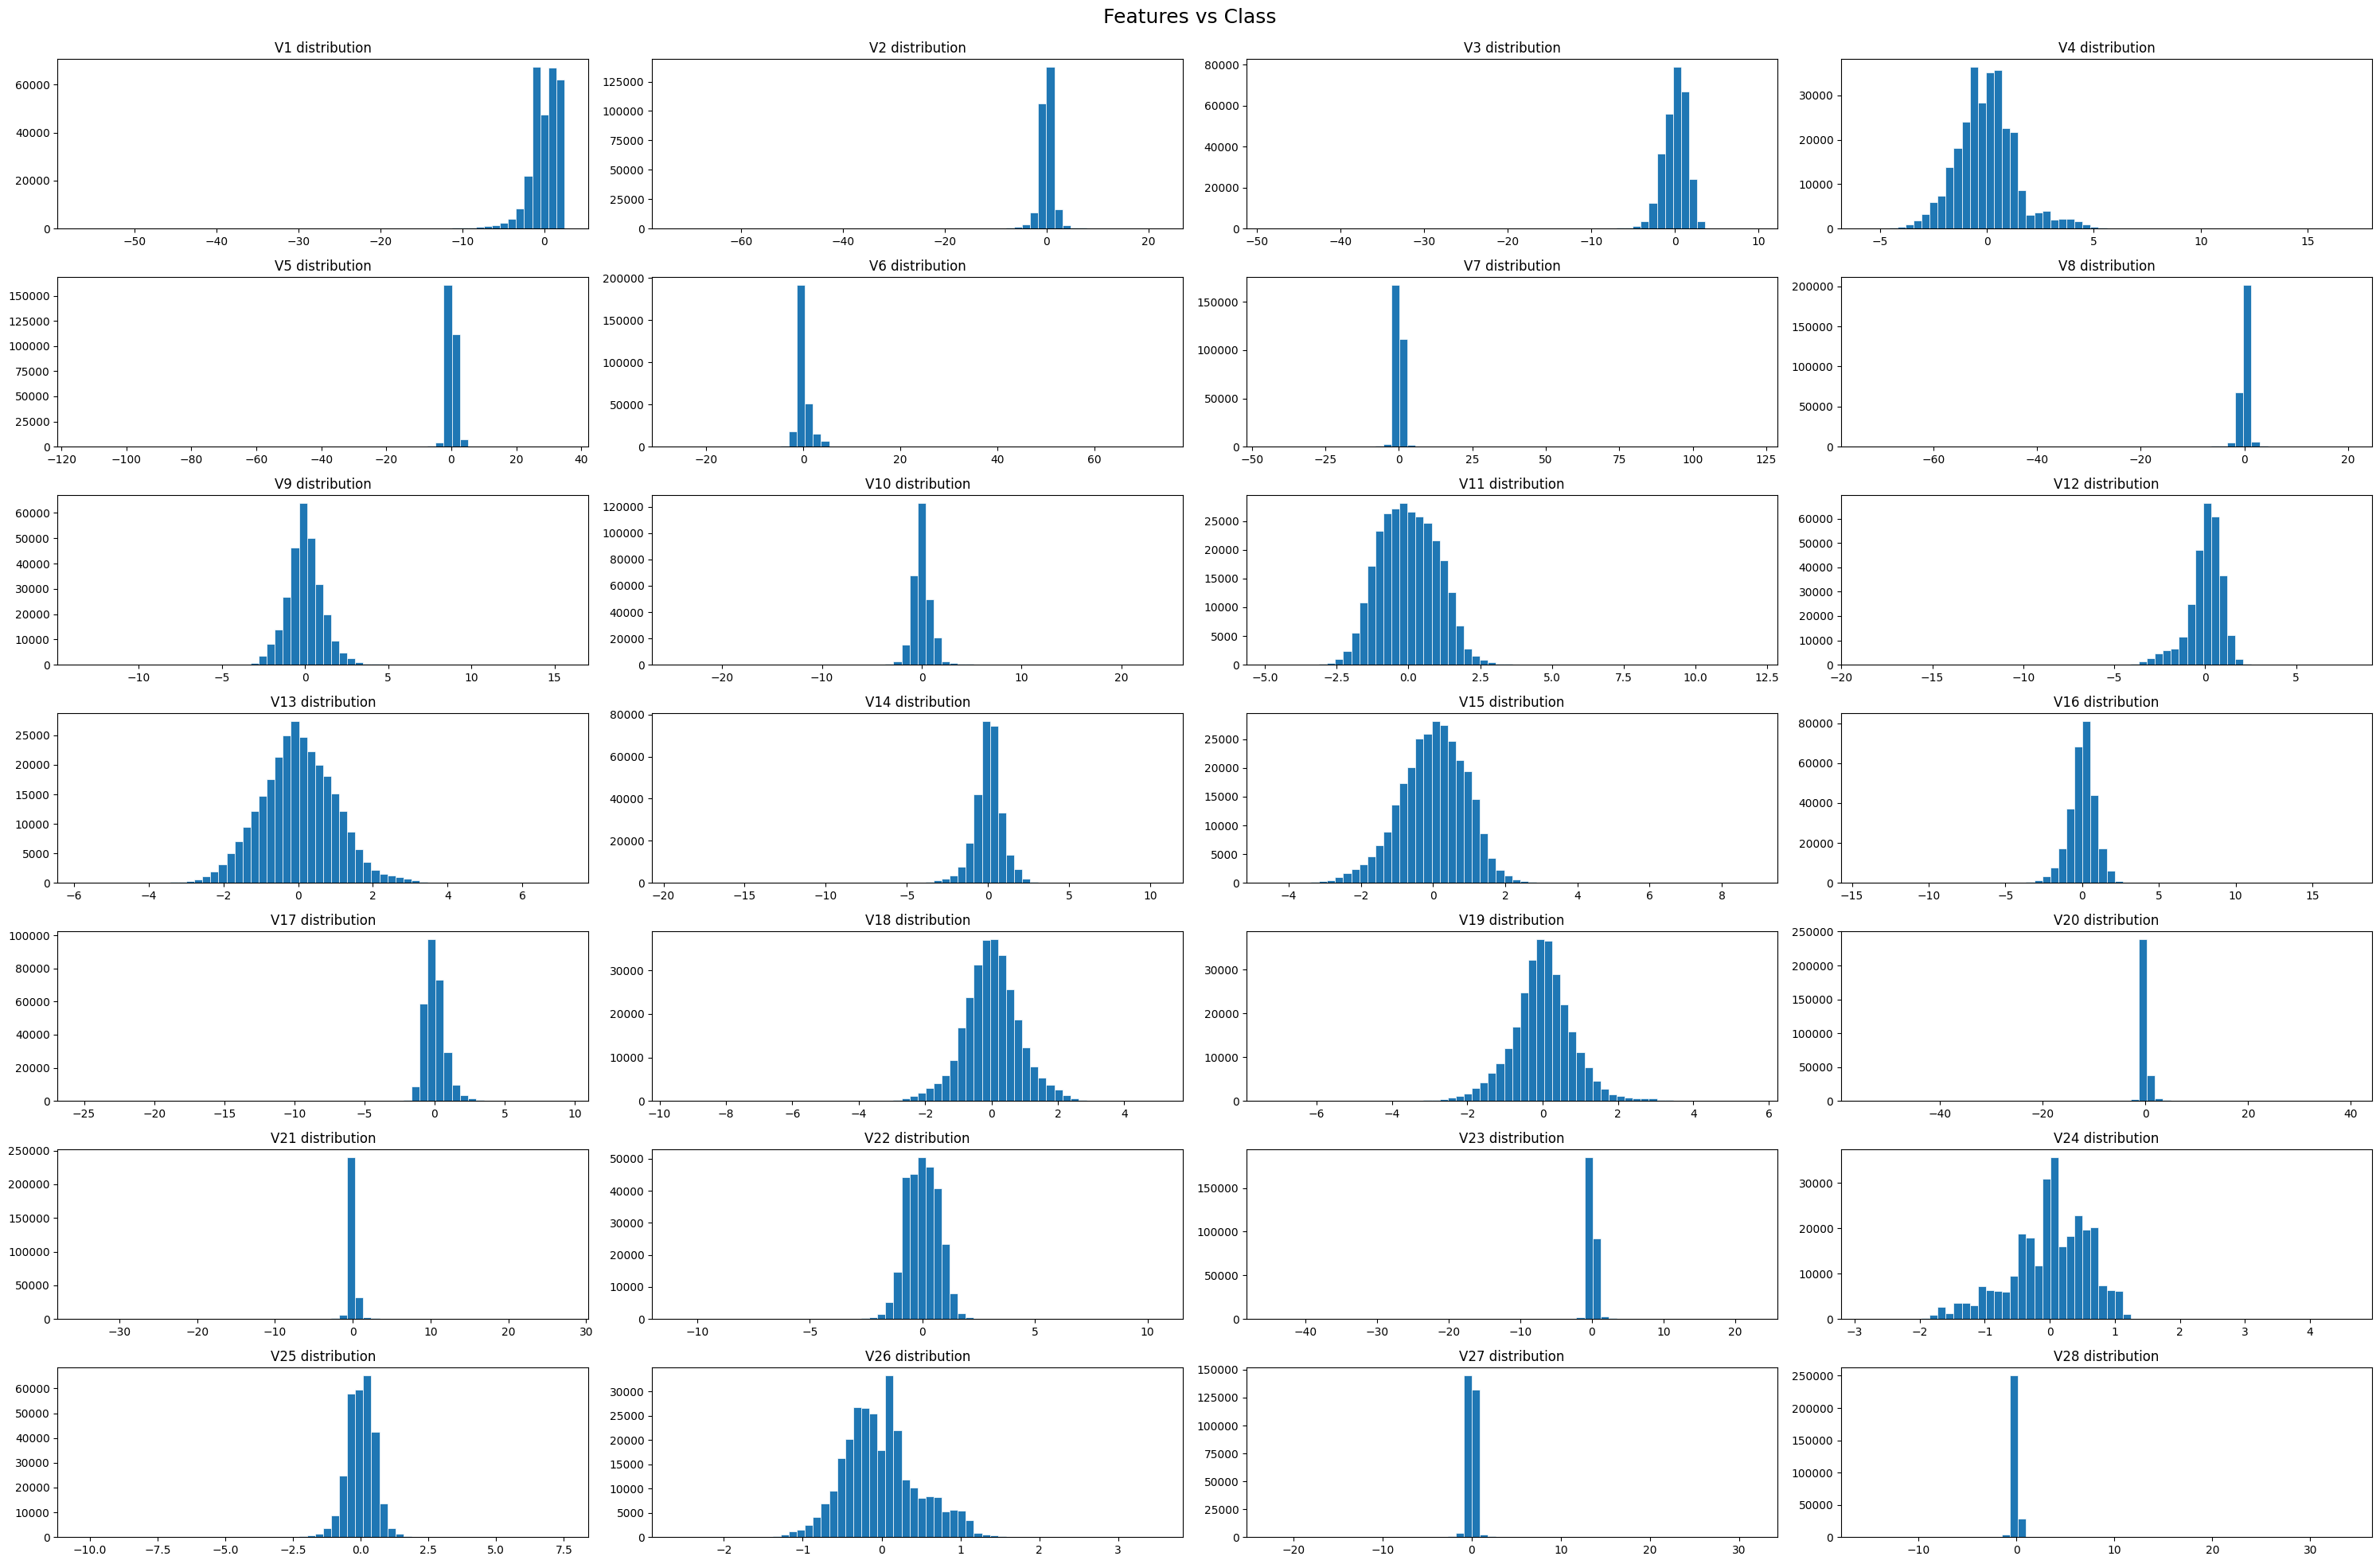

In [38]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(30, 20))
fig.suptitle('Features vs Class\n', size=18)

feature_columns = raw_df.columns[1:29]  # Assuming the feature columns start from index 1

for i in range(7):
    for j in range(4):
        
        col = feature_columns[i * 4 + j]
        axes[i, j].hist(raw_df[col], bins=60, linewidth=0.5, edgecolor="white")
        axes[i, j].set_title(f"{col} distribution")

plt.tight_layout()
plt.show()

## Preprocessing Data

**Drop Duplicates**

In [8]:
df = raw_df.copy()
df.drop_duplicates(inplace=True)

**Transformation from Time to Hour**

In [9]:
# As the time provided is in seconds we can use it as seconds since epoch as we won't care about years
def convert_totime(seconds):
    return datetime.datetime.fromtimestamp(seconds);

timeAnalysis = df[['Time', 'Amount', 'Class']].copy()
timeAnalysis['datetime'] = timeAnalysis.Time.apply(convert_totime)
# As the max time is 172792 seconds and 172792 / (60*60) is about 48 hrs so we only have data for 2 days so only 
df['Hour'] = timeAnalysis.datetime.dt.hour

In [10]:
df = df.drop('Time', axis=1)

**Correlation Matrix**

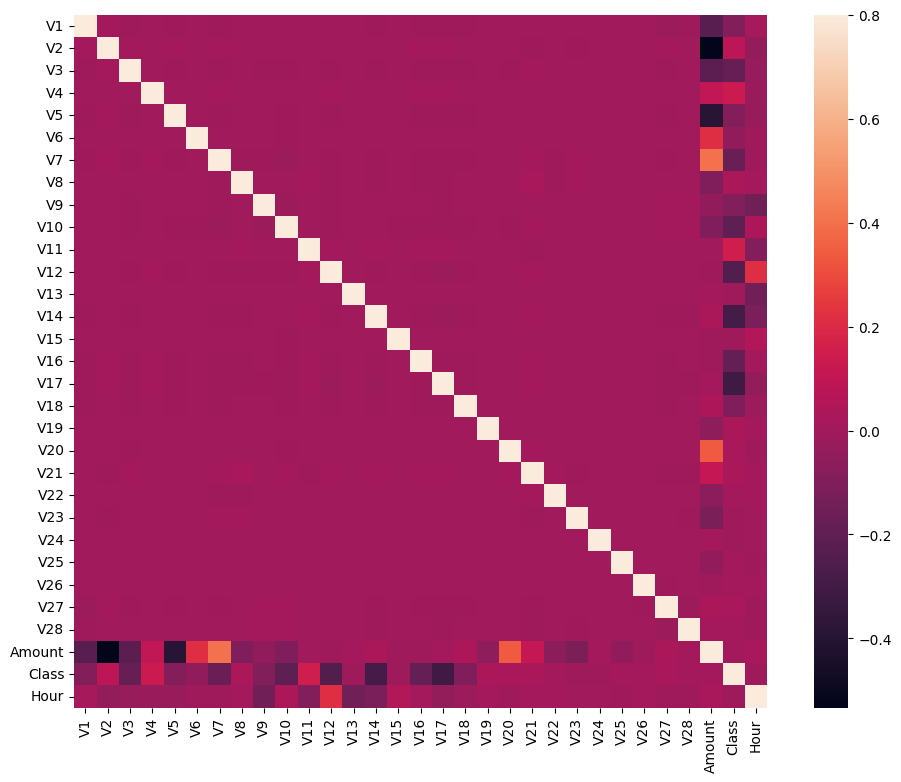

In [11]:
corrmat = df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In the HeatMap we can clearly see that VX features do not correlate to each others but there are some features that either has a positive or a negative correlation with Amount and Time.  This gives us a deeper understanding of the Data available to us.
* V2 and V5 are highly negatively correlated with Amount. 
* V7 and V20 is correlated with Amount.
* V3 is higly negatively correlated with Time.


**Feature Scaling**

In [12]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [13]:
col_names = ['Amount']
df = Standard_Scaler (df, col_names)

## Split Data

Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)


/var/folders/mk/hvz_b0_s0qz0sx1ms4hh6vk40000gn/T/ipykernel_9260/1735497511.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


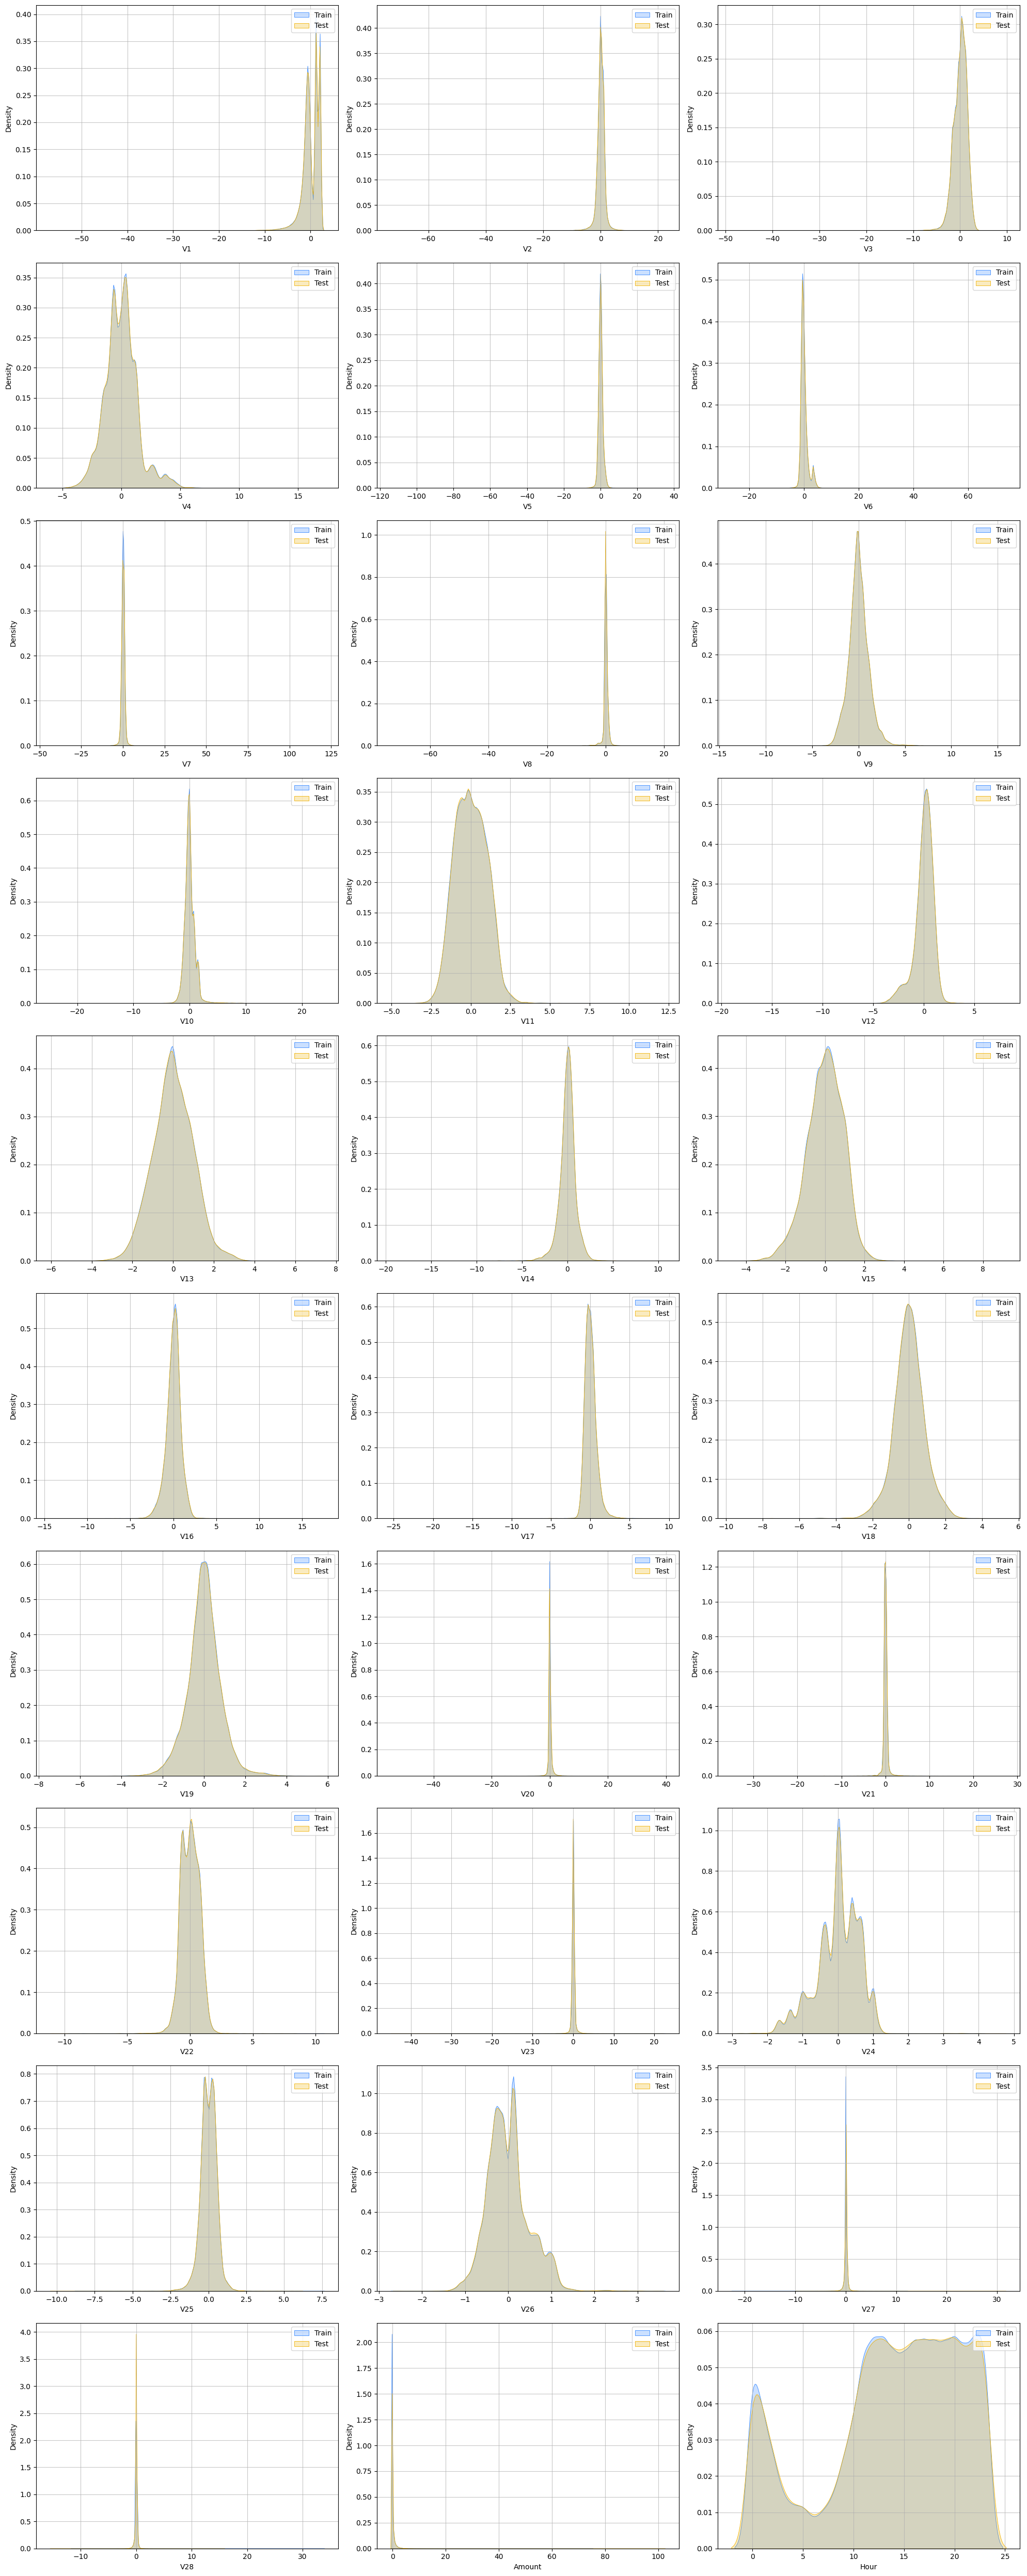

In [15]:
numeric_columns = (list(X_train.loc[:, 'V1':'Hour']))

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = X_train, label = "Train")
    sns.kdeplot(x = num, fill = True,color ="#EFB000",linewidth=0.6, data = X_test, label = "Test")      
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

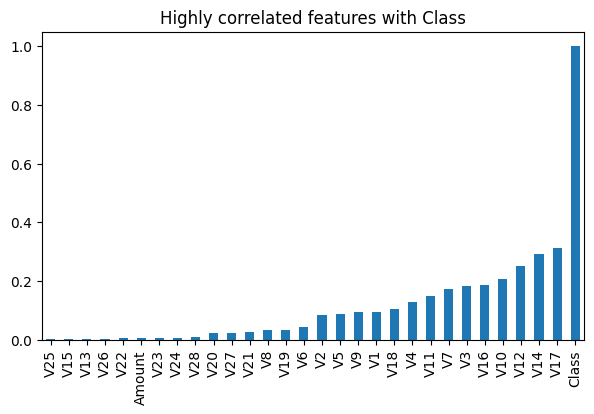

In [16]:
plt.figure(figsize=(7,4))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

## Resampling

In [17]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import TomekLinks

In [18]:
# 1. Resampling
resampling_techniques = {
    "No Resampling": None,
    "SMOTE": SMOTE(),
    "Random": RandomOverSampler(),
    "Tomek": TomekLinks()
}

## Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

In [20]:
# 2. Feature Selection
feature_selection_methods = {
    "No Feature Selection": None,
    "Select K Best k=10": SelectKBest(f_classif, k=10),  
    "Select K Best k=15": SelectKBest(f_classif, k=15)
}

## Machine Learning Models

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

### Grid Search for hyper-parameter estimation with Cross Validation (k=5) 


In [53]:
## Random Forest parameter search, 108dk full compilation
#
grid_space={
    'n_estimators': [10, 30, 50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'random_state': [13], 
    'max_features':[3]
    }

rf = RandomForestClassifier()

grid = GridSearchCV(rf,param_grid=grid_space,cv=5,scoring='recall')
model_gridrf = grid.fit(X_train,y_train)

cv_results = model_gridrf.cv_results_
df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
df.to_csv('filerf.csv')

KeyboardInterrupt: 

In [ ]:
print('Best hyperparameters are: '+str(model_gridrf.best_params_))
print('Best score is: '+str(model_gridrf.best_score_))

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 3, 'min_samples_split': 4, 'n_estimators': 30, 'random_state': 13}
Best score is: 0,755223880597015


In [ ]:
## Logistic Regression parameter search, 
# penalty için l1 değeri çalışmadı
grid_space={
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'max_iter': [100, 1000]
    }

lr = LogisticRegression()

grid = GridSearchCV(lr,param_grid=grid_space,cv=5,scoring='recall')
model_gridlr = grid.fit(X_train,y_train)

cv_results2 = model_gridlr.cv_results_
df2 = pd.DataFrame(cv_results2).sort_values(by='rank_test_score')
df2.to_csv('filelr.csv')

/Users/metalmarketarge/Desktop/Ders notları/Veri Madenciliği/proje/scripts/fraud/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/metalmarketarge/Desktop/Ders notları/Veri Madenciliği/proje/scripts/fraud/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the d

In [ ]:
print('Best hyperparameters are: '+str(model_gridlr.best_params_))
print('Best score is: '+str(model_gridlr.best_score_))

Best hyperparameters are: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Best score is: 0.6345545002261421


In [ ]:
## XGBoost parameter search, 
grid_space={
'learning_rate': [0.2, 0.1, 0.01],
'max_delta_step': [0,1,2,4],
'max_depth': [1,3,5],
'min_child_weight': [1,4,7],
'subsample': [0.8, 0.9, 1]
    }

xg = XGBClassifier()

grid = GridSearchCV(xg,param_grid=grid_space,cv=5,scoring='recall')
model_gridxg = grid.fit(X_train,y_train)

cv_results3 = model_gridxg.cv_results_
df3 = pd.DataFrame(cv_results3).sort_values(by='rank_test_score')
df3.to_csv('filexg.csv')

print('Best hyperparameters are: '+str(model_gridxg.best_params_))
print('Best score is: '+str(model_gridxg.best_score_))

Best hyperparameters are: {'learning_rate': 0.2, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.9}
Best score is: 0.8127544097693352


In [ ]:
## CatBoost parameter search, 
grid_space={
    'learning_rate': [0.2, 0.1, 0.01],
    'depth': [1,5,10],
    'iterations': [50,100],
    'l2_leaf_reg': [0,1]
    }

cb = CatBoostClassifier()

grid = GridSearchCV(cb,param_grid=grid_space,cv=5,scoring='recall')
model_gridcb = grid.fit(X_train,y_train)

cv_results4 = model_gridcb.cv_results_
df4 = pd.DataFrame(cv_results4).sort_values(by='rank_test_score')
df4.to_csv('filecb.csv')


0:	learn: 0.2455493	total: 70.1ms	remaining: 3.44s
1:	learn: 0.0726656	total: 80.4ms	remaining: 1.93s
2:	learn: 0.0290813	total: 89.5ms	remaining: 1.4s
3:	learn: 0.0149073	total: 100ms	remaining: 1.16s
4:	learn: 0.0090762	total: 109ms	remaining: 984ms
5:	learn: 0.0068547	total: 119ms	remaining: 870ms
6:	learn: 0.0055467	total: 129ms	remaining: 791ms
7:	learn: 0.0048776	total: 137ms	remaining: 721ms
8:	learn: 0.0044824	total: 146ms	remaining: 663ms
9:	learn: 0.0042475	total: 154ms	remaining: 616ms
10:	learn: 0.0040939	total: 163ms	remaining: 577ms
11:	learn: 0.0039922	total: 172ms	remaining: 545ms
12:	learn: 0.0039269	total: 181ms	remaining: 515ms
13:	learn: 0.0038808	total: 189ms	remaining: 486ms
14:	learn: 0.0038407	total: 197ms	remaining: 460ms
15:	learn: 0.0038197	total: 206ms	remaining: 437ms
16:	learn: 0.0037534	total: 214ms	remaining: 416ms
17:	learn: 0.0037173	total: 222ms	remaining: 395ms
18:	learn: 0.0036906	total: 231ms	remaining: 376ms
19:	learn: 0.0036605	total: 239ms	remai

Training has stopped (degenerate solution on iteration 6, probably too small l2-regularization, try to increase it)


0:	learn: 0.1788979	total: 19.6ms	remaining: 959ms
1:	learn: 0.0536701	total: 35.7ms	remaining: 856ms
2:	learn: 0.0208533	total: 52.2ms	remaining: 819ms
3:	learn: 0.0111734	total: 66.9ms	remaining: 769ms
4:	learn: 0.0092994	total: 81.3ms	remaining: 732ms
5:	learn: 0.0036470	total: 100ms	remaining: 735ms
6:	learn: 0.0015205	total: 122ms	remaining: 752ms
7:	learn: 0.0010389	total: 138ms	remaining: 725ms
8:	learn: 0.0005194	total: 156ms	remaining: 712ms
9:	learn: 0.0005194	total: 170ms	remaining: 679ms
10:	learn: 0.0003561	total: 185ms	remaining: 657ms
11:	learn: 0.0002169	total: 200ms	remaining: 634ms
12:	learn: 0.0001161	total: 215ms	remaining: 613ms
13:	learn: -0.0003565	total: 232ms	remaining: 597ms
14:	learn: -0.0022013	total: 252ms	remaining: 589ms
15:	learn: -0.0023066	total: 277ms	remaining: 589ms
16:	learn: -0.0023925	total: 299ms	remaining: 581ms
17:	learn: -0.0023925	total: 316ms	remaining: 561ms
18:	learn: -0.0024314	total: 337ms	remaining: 550ms
19:	learn: -0.0024933	total: 3

Training has stopped (degenerate solution on iteration 15, probably too small l2-regularization, try to increase it)


0:	learn: 0.3587377	total: 17.8ms	remaining: 872ms
1:	learn: 0.1781071	total: 35.8ms	remaining: 859ms
2:	learn: 0.0868001	total: 54.1ms	remaining: 848ms
3:	learn: 0.0476029	total: 75.1ms	remaining: 863ms
4:	learn: 0.0284188	total: 92.8ms	remaining: 836ms
5:	learn: 0.0183889	total: 112ms	remaining: 823ms
6:	learn: 0.0148525	total: 134ms	remaining: 822ms
7:	learn: 0.0106379	total: 158ms	remaining: 828ms
8:	learn: 0.0077309	total: 177ms	remaining: 808ms
9:	learn: 0.0060951	total: 197ms	remaining: 789ms
10:	learn: 0.0049479	total: 217ms	remaining: 770ms
11:	learn: 0.0041383	total: 240ms	remaining: 759ms
12:	learn: 0.0036262	total: 268ms	remaining: 762ms
13:	learn: 0.0032878	total: 301ms	remaining: 774ms
14:	learn: 0.0030170	total: 334ms	remaining: 780ms
15:	learn: 0.0028254	total: 359ms	remaining: 764ms
16:	learn: 0.0026524	total: 384ms	remaining: 745ms
17:	learn: 0.0025317	total: 411ms	remaining: 731ms
18:	learn: 0.0023874	total: 440ms	remaining: 718ms
19:	learn: 0.0023024	total: 465ms	re

Training has stopped (degenerate solution on iteration 6, probably too small l2-regularization, try to increase it)


0:	learn: 0.1788979	total: 15.5ms	remaining: 1.53s
1:	learn: 0.0536701	total: 30.9ms	remaining: 1.51s
2:	learn: 0.0208533	total: 46.3ms	remaining: 1.5s
3:	learn: 0.0111734	total: 106ms	remaining: 2.54s
4:	learn: 0.0092994	total: 137ms	remaining: 2.6s
5:	learn: 0.0036470	total: 157ms	remaining: 2.46s
6:	learn: 0.0015205	total: 178ms	remaining: 2.36s
7:	learn: 0.0010389	total: 194ms	remaining: 2.23s
8:	learn: 0.0005194	total: 215ms	remaining: 2.17s
9:	learn: 0.0005194	total: 231ms	remaining: 2.08s
10:	learn: 0.0003561	total: 254ms	remaining: 2.06s
11:	learn: 0.0002169	total: 276ms	remaining: 2.02s
12:	learn: 0.0001161	total: 296ms	remaining: 1.98s
13:	learn: -0.0003565	total: 311ms	remaining: 1.91s
14:	learn: -0.0022013	total: 328ms	remaining: 1.86s
15:	learn: -0.0023066	total: 348ms	remaining: 1.83s
16:	learn: -0.0023925	total: 363ms	remaining: 1.77s
17:	learn: -0.0023925	total: 376ms	remaining: 1.71s
18:	learn: -0.0024314	total: 392ms	remaining: 1.67s
19:	learn: -0.0024933	total: 407ms

Training has stopped (degenerate solution on iteration 15, probably too small l2-regularization, try to increase it)


0:	learn: 0.3587377	total: 17.4ms	remaining: 1.72s
1:	learn: 0.1781071	total: 33.8ms	remaining: 1.66s
2:	learn: 0.0868001	total: 52.4ms	remaining: 1.69s
3:	learn: 0.0476029	total: 71.6ms	remaining: 1.72s
4:	learn: 0.0284188	total: 93.3ms	remaining: 1.77s
5:	learn: 0.0183889	total: 114ms	remaining: 1.78s
6:	learn: 0.0148525	total: 131ms	remaining: 1.75s
7:	learn: 0.0106379	total: 152ms	remaining: 1.75s
8:	learn: 0.0077309	total: 173ms	remaining: 1.75s
9:	learn: 0.0060951	total: 193ms	remaining: 1.74s
10:	learn: 0.0049479	total: 213ms	remaining: 1.73s
11:	learn: 0.0041383	total: 239ms	remaining: 1.75s
12:	learn: 0.0036262	total: 265ms	remaining: 1.77s
13:	learn: 0.0032878	total: 290ms	remaining: 1.78s
14:	learn: 0.0030170	total: 310ms	remaining: 1.76s
15:	learn: 0.0028254	total: 327ms	remaining: 1.72s
16:	learn: 0.0026524	total: 346ms	remaining: 1.69s
17:	learn: 0.0025317	total: 365ms	remaining: 1.66s
18:	learn: 0.0023874	total: 383ms	remaining: 1.63s
19:	learn: 0.0023024	total: 402ms	re

Training has stopped (degenerate solution on iteration 7, probably too small l2-regularization, try to increase it)


0:	learn: 0.1285499	total: 56.2ms	remaining: 2.75s
1:	learn: 0.0268345	total: 120ms	remaining: 2.89s
2:	learn: 0.0087047	total: 184ms	remaining: 2.89s
3:	learn: 0.0105051	total: 245ms	remaining: 2.82s
4:	learn: 0.0084819	total: 323ms	remaining: 2.91s
5:	learn: 0.0084819	total: 335ms	remaining: 2.45s
6:	learn: 0.0084819	total: 345ms	remaining: 2.12s
7:	learn: 0.0084819	total: 354ms	remaining: 1.86s
8:	learn: 0.0084819	total: 363ms	remaining: 1.66s
9:	learn: 0.0084819	total: 372ms	remaining: 1.49s
10:	learn: 0.0084819	total: 382ms	remaining: 1.35s
11:	learn: 0.0084819	total: 391ms	remaining: 1.24s
12:	learn: 0.0084819	total: 400ms	remaining: 1.14s
13:	learn: 0.0084819	total: 409ms	remaining: 1.05s
14:	learn: 0.0084819	total: 419ms	remaining: 978ms
15:	learn: 0.0084819	total: 428ms	remaining: 910ms
16:	learn: 0.0084819	total: 437ms	remaining: 848ms
17:	learn: 0.0084819	total: 446ms	remaining: 793ms
18:	learn: 0.0084819	total: 455ms	remaining: 742ms
19:	learn: 0.0084819	total: 464ms	remain

Training has stopped (degenerate solution on iteration 10, probably too small l2-regularization, try to increase it)


0:	learn: 0.3125143	total: 58.9ms	remaining: 2.89s
1:	learn: 0.1424918	total: 119ms	remaining: 2.85s
2:	learn: 0.0660863	total: 185ms	remaining: 2.9s
3:	learn: 0.0307556	total: 254ms	remaining: 2.92s
4:	learn: 0.0142637	total: 329ms	remaining: 2.96s
5:	learn: 0.0081017	total: 395ms	remaining: 2.89s
6:	learn: 0.0049026	total: 459ms	remaining: 2.82s
7:	learn: 0.0045451	total: 516ms	remaining: 2.71s
8:	learn: 0.0034418	total: 579ms	remaining: 2.64s
9:	learn: 0.0036183	total: 637ms	remaining: 2.55s
10:	learn: 0.0031978	total: 695ms	remaining: 2.46s
11:	learn: 0.0030049	total: 759ms	remaining: 2.4s
12:	learn: 0.0027437	total: 833ms	remaining: 2.37s
13:	learn: 0.0024732	total: 903ms	remaining: 2.32s
14:	learn: 0.0023747	total: 959ms	remaining: 2.24s
15:	learn: 0.0022622	total: 1.02s	remaining: 2.16s
16:	learn: 0.0022329	total: 1.07s	remaining: 2.08s
17:	learn: 0.0022329	total: 1.13s	remaining: 2s
18:	learn: 0.0021853	total: 1.19s	remaining: 1.94s
19:	learn: 0.0021853	total: 1.2s	remaining: 1

Training has stopped (degenerate solution on iteration 7, probably too small l2-regularization, try to increase it)


0:	learn: 0.1285499	total: 60.1ms	remaining: 5.95s
1:	learn: 0.0268345	total: 125ms	remaining: 6.14s
2:	learn: 0.0087047	total: 189ms	remaining: 6.12s
3:	learn: 0.0105051	total: 250ms	remaining: 6.01s
4:	learn: 0.0084819	total: 324ms	remaining: 6.16s
5:	learn: 0.0084819	total: 336ms	remaining: 5.27s
6:	learn: 0.0084819	total: 346ms	remaining: 4.6s
7:	learn: 0.0084819	total: 356ms	remaining: 4.1s
8:	learn: 0.0084819	total: 367ms	remaining: 3.71s
9:	learn: 0.0084819	total: 375ms	remaining: 3.38s
10:	learn: 0.0084819	total: 385ms	remaining: 3.11s
11:	learn: 0.0084819	total: 393ms	remaining: 2.88s
12:	learn: 0.0084819	total: 403ms	remaining: 2.7s
13:	learn: 0.0084819	total: 413ms	remaining: 2.54s
14:	learn: 0.0084819	total: 422ms	remaining: 2.39s
15:	learn: 0.0084819	total: 431ms	remaining: 2.27s
16:	learn: 0.0084819	total: 441ms	remaining: 2.15s
17:	learn: 0.0084819	total: 451ms	remaining: 2.05s
18:	learn: 0.0084819	total: 460ms	remaining: 1.96s
19:	learn: 0.0084819	total: 469ms	remaining

Training has stopped (degenerate solution on iteration 10, probably too small l2-regularization, try to increase it)


0:	learn: 0.3125143	total: 56ms	remaining: 5.55s
1:	learn: 0.1424918	total: 125ms	remaining: 6.13s
2:	learn: 0.0660863	total: 192ms	remaining: 6.19s
3:	learn: 0.0307556	total: 269ms	remaining: 6.45s
4:	learn: 0.0142637	total: 346ms	remaining: 6.56s
5:	learn: 0.0081017	total: 412ms	remaining: 6.45s
6:	learn: 0.0049026	total: 485ms	remaining: 6.45s
7:	learn: 0.0045451	total: 552ms	remaining: 6.34s
8:	learn: 0.0034418	total: 623ms	remaining: 6.29s
9:	learn: 0.0036183	total: 680ms	remaining: 6.12s
10:	learn: 0.0031978	total: 740ms	remaining: 5.99s
11:	learn: 0.0030049	total: 796ms	remaining: 5.84s
12:	learn: 0.0027437	total: 868ms	remaining: 5.8s
13:	learn: 0.0024732	total: 938ms	remaining: 5.76s
14:	learn: 0.0023747	total: 995ms	remaining: 5.64s
15:	learn: 0.0022622	total: 1.06s	remaining: 5.54s
16:	learn: 0.0022329	total: 1.12s	remaining: 5.45s
17:	learn: 0.0022329	total: 1.18s	remaining: 5.38s
18:	learn: 0.0021853	total: 1.25s	remaining: 5.34s
19:	learn: 0.0021853	total: 1.26s	remaining

Training has stopped (degenerate solution on iteration 52, probably too small l2-regularization, try to increase it)


0:	learn: 0.6431798	total: 55.7ms	remaining: 5.52s
1:	learn: 0.5980317	total: 118ms	remaining: 5.78s
2:	learn: 0.5551115	total: 190ms	remaining: 6.14s
3:	learn: 0.5148114	total: 260ms	remaining: 6.23s
4:	learn: 0.4788473	total: 338ms	remaining: 6.42s
5:	learn: 0.4449237	total: 416ms	remaining: 6.52s
6:	learn: 0.4121441	total: 503ms	remaining: 6.68s
7:	learn: 0.3794505	total: 582ms	remaining: 6.69s
8:	learn: 0.3520895	total: 660ms	remaining: 6.67s
9:	learn: 0.3264026	total: 746ms	remaining: 6.71s
10:	learn: 0.3014824	total: 827ms	remaining: 6.69s
11:	learn: 0.2784986	total: 917ms	remaining: 6.72s
12:	learn: 0.2578094	total: 998ms	remaining: 6.68s
13:	learn: 0.2406997	total: 1.07s	remaining: 6.56s
14:	learn: 0.2228368	total: 1.14s	remaining: 6.48s
15:	learn: 0.2067191	total: 1.22s	remaining: 6.4s
16:	learn: 0.1906085	total: 1.3s	remaining: 6.37s
17:	learn: 0.1778026	total: 1.39s	remaining: 6.32s
18:	learn: 0.1636206	total: 1.46s	remaining: 6.22s
19:	learn: 0.1503755	total: 1.53s	remainin

Training has stopped (degenerate solution on iteration 62, probably too small l2-regularization, try to increase it)


0:	learn: 0.6434993	total: 55.3ms	remaining: 5.48s
1:	learn: 0.5982661	total: 118ms	remaining: 5.78s
2:	learn: 0.5560162	total: 189ms	remaining: 6.12s
3:	learn: 0.5164294	total: 260ms	remaining: 6.24s
4:	learn: 0.4805670	total: 338ms	remaining: 6.42s
5:	learn: 0.4475427	total: 417ms	remaining: 6.53s
6:	learn: 0.4144836	total: 498ms	remaining: 6.62s
7:	learn: 0.3820207	total: 594ms	remaining: 6.83s
8:	learn: 0.3537138	total: 680ms	remaining: 6.88s
9:	learn: 0.3283782	total: 760ms	remaining: 6.84s
10:	learn: 0.3038557	total: 846ms	remaining: 6.84s
11:	learn: 0.2812437	total: 963ms	remaining: 7.06s
12:	learn: 0.2604224	total: 1.05s	remaining: 7.04s
13:	learn: 0.2426642	total: 1.14s	remaining: 6.97s
14:	learn: 0.2244351	total: 1.22s	remaining: 6.91s
15:	learn: 0.2087550	total: 1.3s	remaining: 6.82s
16:	learn: 0.1926715	total: 1.37s	remaining: 6.7s
17:	learn: 0.1797573	total: 1.45s	remaining: 6.58s
18:	learn: 0.1657806	total: 1.53s	remaining: 6.52s
19:	learn: 0.1525865	total: 1.6s	remaining

Training has stopped (degenerate solution on iteration 60, probably too small l2-regularization, try to increase it)


0:	learn: 0.1914214	total: 58.2ms	remaining: 5.76s
1:	learn: 0.0621313	total: 123ms	remaining: 6.04s
2:	learn: 0.0219480	total: 188ms	remaining: 6.07s
3:	learn: 0.0098589	total: 257ms	remaining: 6.16s
4:	learn: 0.0054185	total: 328ms	remaining: 6.24s
5:	learn: 0.0036473	total: 396ms	remaining: 6.21s
6:	learn: 0.0026858	total: 459ms	remaining: 6.1s
7:	learn: 0.0022681	total: 521ms	remaining: 6s
8:	learn: 0.0020027	total: 586ms	remaining: 5.92s
9:	learn: 0.0018488	total: 648ms	remaining: 5.83s
10:	learn: 0.0017186	total: 710ms	remaining: 5.75s
11:	learn: 0.0016260	total: 783ms	remaining: 5.74s
12:	learn: 0.0015836	total: 847ms	remaining: 5.67s
13:	learn: 0.0015148	total: 908ms	remaining: 5.58s
14:	learn: 0.0014556	total: 969ms	remaining: 5.49s
15:	learn: 0.0014147	total: 1.03s	remaining: 5.42s
16:	learn: 0.0013729	total: 1.12s	remaining: 5.46s
17:	learn: 0.0013334	total: 1.19s	remaining: 5.4s
18:	learn: 0.0012479	total: 1.25s	remaining: 5.35s
19:	learn: 0.0011902	total: 1.33s	remaining: 

In [ ]:
print('Best hyperparameters are: '+str(model_gridcb.best_params_))
print('Best score is: '+str(model_gridcb.best_score_))

Best hyperparameters are: {'depth': 5, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.2}
Best score is: 0.8066938037087292


### Grid Search Results

In [22]:
# 3. Makine Öğrenmesi
models = {
    "Random Forest": RandomForestClassifier(criterion='entropy', max_depth=15, max_features=3, min_samples_split=4, n_estimators=30, random_state=13),
    "Logistic Regression": LogisticRegression(C=1.0, penalty='l2', max_iter=100),
    "XGBoost": XGBClassifier(learning_rate=0.2, max_delta_step=2, max_depth=3, min_child_weight=4, subsample=0.9),
    "CatBoost": CatBoostClassifier(depth=5, iterations=100, l2_leaf_reg=1, learning_rate=0.2, eval_metric='Recall', random_seed = 42)
}

## Evaluation

In [23]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from imblearn.pipeline import Pipeline as ImbPipeline
import time

In [24]:
# Modellerin karşılaştırılması için ROC eğrilerini ve confusion matrixleri tutacak listeler
metrics = {}
confusion_matrices = {}

# Pipeline'ı oluştur ve deneyleri yap
for resampling_name, resampler in resampling_techniques.items():
    for fs_name, feature_selector in feature_selection_methods.items():
        for model_name, model in models.items():
            # imbalanced-learn Pipeline kullanımı
            pipeline = ImbPipeline([
                ('resampler', resampler) if resampler else ('identity_resampler', None),
                ('feature_selector', feature_selector) if feature_selector else ('identity_selector', None),
                ('classifier', model)
            ])
            
            # Modeli eğit
            since = time.time()
            pipeline.fit(X_train, y_train)
            train_time = time.time() - since
            
            # Test seti üzerinde tahmin yap
            since2 = time.time()
            y_pred = pipeline.predict(X_test)
            test_time = time.time()-since2
            total_time = train_time+test_time

            # Sınıflandırma raporunu yazdır
            print(f"Resampling: {resampling_name}, Feature Selection: {fs_name}, Model: {model_name}")
            print(classification_report(y_test, y_pred))

            # Metrikleri hesapla
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            mcc = matthews_corrcoef(y_test, y_pred)

            # FPR, TPR ve eşik değerlerini al
            fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            # Metrikleri sakla
            metrics[f"{model_name} - {resampling_name} - {fs_name}"] = [recall, precision, accuracy, f1, roc_auc, mcc, fpr, tpr, train_time, test_time, total_time]

            # Confusion matrix'i sakla
            cm = confusion_matrix(y_test, y_pred)
            confusion_matrices[f"{model_name} - {resampling_name} - {fs_name}"] = cm

            




Resampling: No Resampling, Feature Selection: No Feature Selection, Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.95      0.73      0.83       142

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



/Users/metalmarketarge/Desktop/Ders notları/Veri Madenciliği/proje/scripts/fraud/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resampling: No Resampling, Feature Selection: No Feature Selection, Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118

Resampling: No Resampling, Feature Selection: No Feature Selection, Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.92      0.76      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

0:	learn: 0.7311178	total: 81.4ms	remaining: 8.06s
1:	learn: 0.6314199	total: 99.2ms	remaining: 4.86s
2:	learn: 0.6344411	total: 116ms	remaining: 3.75s
3:	learn: 0.7009

/Users/metalmarketarge/Desktop/Ders notları/Veri Madenciliği/proje/scripts/fraud/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resampling: SMOTE, Feature Selection: No Feature Selection, Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

Resampling: SMOTE, Feature Selection: No Feature Selection, Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.19      0.85      0.31       142

    accuracy                           0.99     85118
   macro avg       0.59      0.92      0.65     85118
weighted avg       1.00      0.99      1.00     85118

0:	learn: 0.9227949	total: 47ms	remaining: 4.65s
1:	learn: 0.9176506	total: 88.5ms	remaining: 4.34s
2:	learn: 0.9204951	total: 148ms	remaining: 4.79s
3:	learn: 0.9333861	total: 195ms	r

/Users/metalmarketarge/Desktop/Ders notları/Veri Madenciliği/proje/scripts/fraud/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resampling: Random, Feature Selection: No Feature Selection, Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

Resampling: Random, Feature Selection: No Feature Selection, Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.48      0.85      0.62       142

    accuracy                           1.00     85118
   macro avg       0.74      0.93      0.81     85118
weighted avg       1.00      1.00      1.00     85118

0:	learn: 0.9451273	total: 46.5ms	remaining: 4.6s
1:	learn: 0.9424038	total: 88.5ms	remaining: 4.34s
2:	learn: 0.9418188	total: 124ms	remaining: 4.02s
3:	learn: 0.9546039	total: 165m

/Users/metalmarketarge/Desktop/Ders notları/Veri Madenciliği/proje/scripts/fraud/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resampling: Tomek, Feature Selection: No Feature Selection, Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.57      0.68       142

    accuracy                           1.00     85118
   macro avg       0.92      0.79      0.84     85118
weighted avg       1.00      1.00      1.00     85118

Resampling: Tomek, Feature Selection: No Feature Selection, Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.94      0.76      0.84       142

    accuracy                           1.00     85118
   macro avg       0.97      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

0:	learn: 0.7371601	total: 23.7ms	remaining: 2.34s
1:	learn: 0.6283988	total: 42.6ms	remaining: 2.09s
2:	learn: 0.6888218	total: 61.2ms	remaining: 1.98s
3:	learn: 0.7552870	total: 80.8

In [25]:
# Metrikleri DataFrame'e dönüştür
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Recall', 'Precision', 'Accuracy', 'F1 Score', 'AUC', 'MCC', 'fpr', 'tpr','Train_Time', 'Test_Time', 'Total_Time'])

metrics_df_excel = metrics_df[['Recall', 'Precision', 'Accuracy', 'F1 Score', 'AUC', 'MCC', 'Train_Time', 'Test_Time', 'Total_Time']]
# Metrikleri CSV dosyasına kaydet
metrics_df_excel.to_csv('metrics3.csv')

In [26]:
metrics_df

,Recall,Precision,Accuracy,F1 Score,AUC,MCC,fpr,tpr,Train_Time,Test_Time,Total_Time
Random Forest - No Resampling - No Feature Selection,0.732394,0.954128,0.999495,0.828685,0.940695,0.835712,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.08450704225352113, 0.1056338028169014,...",21.231660,0.204758,21.436418
Logistic Regression - No Resampling - No Feature Selection,0.570423,0.843750,0.999107,0.680672,0.965641,0.693351,"[0.0, 0.0, 0.0, 4.7072114479382414e-05, 4.7072...","[0.0, 0.007042253521126761, 0.1478873239436619...",2.273705,0.011402,2.285107
XGBoost - No Resampling - No Feature Selection,0.760563,0.923077,0.999495,0.833977,0.972514,0.837649,"[0.0, 0.0, 0.0, 2.3536057239691207e-05, 2.3536...","[0.0, 0.007042253521126761, 0.352112676056338,...",1.266710,0.035926,1.302636
CatBoost - No Resampling - No Feature Selection,0.732394,0.962963,0.999507,0.832000,0.965690,0.839581,"[0.0, 0.0, 0.0, 3.530408585953681e-05, 3.53040...","[0.0, 0.007042253521126761, 0.3661971830985915...",2.529790,0.037001,2.566791
Random Forest - No Resampling - Select K Best k=10,0.753521,0.946903,0.999518,0.839216,0.951481,0.844473,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.21830985915492956, 0.22535211267605634...",19.598007,0.153624,19.751631
Logistic Regression - No Resampling - Select K Best k=10,0.563380,0.851064,0.999107,0.677966,0.965520,0.692042,"[0.0, 0.0, 0.0, 2.3536057239691207e-05, 2.3536...","[0.0, 0.007042253521126761, 0.0563380281690140...",0.564022,0.017938,0.581960
XGBoost - No Resampling - Select K Best k=10,0.774648,0.866142,0.999424,0.817844,0.971046,0.818835,"[0.0, 1.1768028619845604e-05, 1.17680286198456...","[0.0, 0.0, 0.176056338028169, 0.19014084507042...",0.799749,0.032252,0.832001
CatBoost - No Resampling - Select K Best k=10,0.718310,0.886957,0.999377,0.793774,0.968872,0.797895,"[0.0, 0.0, 0.0, 1.1768028619845604e-05, 1.1768...","[0.0, 0.007042253521126761, 0.176056338028169,...",1.089904,0.039825,1.129729
Random Forest - No Resampling - Select K Best k=15,0.739437,0.937500,0.999483,0.826772,0.959920,0.832360,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.19718309859154928, 0.22535211267605634...",20.213359,0.159097,20.372456
Logistic Regression - No Resampling - Select K Best k=15,0.563380,0.860215,0.999119,0.680851,0.962797,0.695763,"[0.0, 0.0, 0.0, 2.3536057239691207e-05, 2.3536...","[0.0, 0.007042253521126761, 0.0563380281690140...",0.772253,0.012541,0.784794


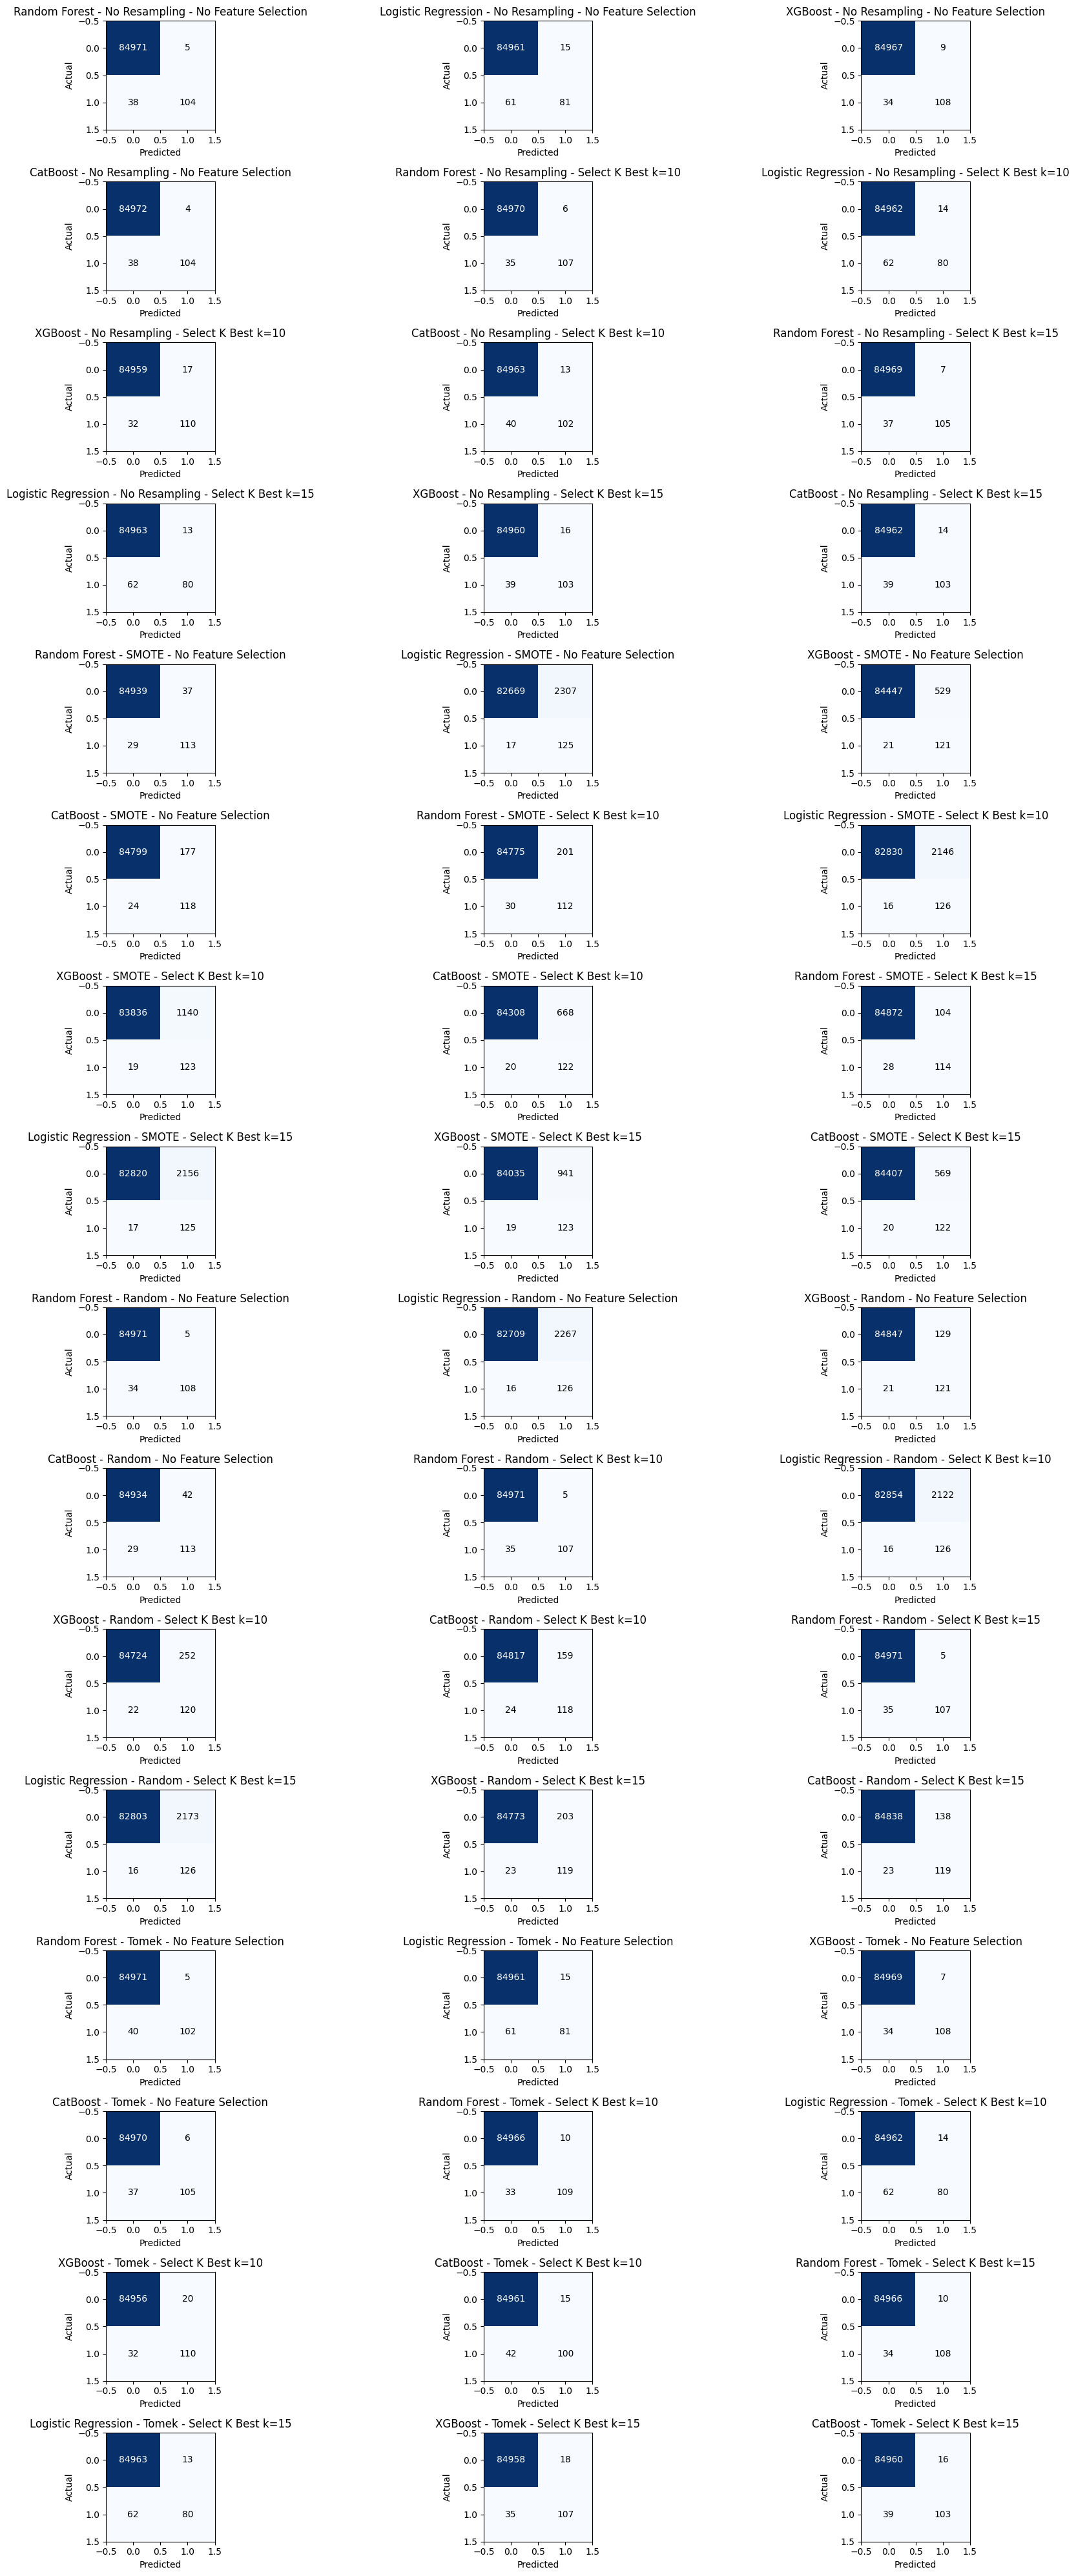

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming confusion_matrices is a dictionary where keys are model names and values are confusion matrices

# Create a figure and axis
fig, axes = plt.subplots(16, 3, figsize=(20, 40))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Iterate over the confusion matrices and plot them
for i, (model_name, confusion_matrix) in enumerate(confusion_matrices.items()):
    row_idx = i // 3
    col_idx = i % 3
    
    ax = axes_flat[i]
    
    # Plot the confusion matrix without using ConfusionMatrixDisplay
    im = ax.imshow(confusion_matrix, cmap="Blues", interpolation="nearest")
    
    # Add values inside the heatmap
    for row in range(len(confusion_matrix)):
        for col in range(len(confusion_matrix[0])):
            ax.text(col, row, f'{confusion_matrix[row, col]:.0f}', ha="center", va="center", color="white" if confusion_matrix[row, col] > confusion_matrix.max() / 2 else "black")

    # Set title and labels
    ax.set_title(model_name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# Confusion Matrix'leri yazdır
print("\nConfusion Matrices:")
for model_name, cm in confusion_matrices.items():
    print(f"{model_name}:\n{cm}\n")


Confusion Matrices:
Random Forest - No Resampling - No Feature Selection:
[[84971     5]
 [   38   104]]

Logistic Regression - No Resampling - No Feature Selection:
[[84961    15]
 [   61    81]]

XGBoost - No Resampling - No Feature Selection:
[[84967     9]
 [   34   108]]

CatBoost - No Resampling - No Feature Selection:
[[84972     4]
 [   38   104]]

Random Forest - No Resampling - Select K Best k=10:
[[84970     6]
 [   35   107]]

Logistic Regression - No Resampling - Select K Best k=10:
[[84962    14]
 [   62    80]]

XGBoost - No Resampling - Select K Best k=10:
[[84959    17]
 [   32   110]]

CatBoost - No Resampling - Select K Best k=10:
[[84963    13]
 [   40   102]]

Random Forest - No Resampling - Select K Best k=15:
[[84969     7]
 [   37   105]]

Logistic Regression - No Resampling - Select K Best k=15:
[[84963    13]
 [   62    80]]

XGBoost - No Resampling - Select K Best k=15:
[[84960    16]
 [   39   103]]

CatBoost - No Resampling - Select K Best k=15:
[[84962   